In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

from disp import get_line, set_color, set_plot
from my_torch import fit_song_fmtn
from run_train import TrainArgs, train

cc = np.concatenate

In [2]:
args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_rgr", save_training=1, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir="fly_mini/rgr",
    # blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir="fly_mini/rgr_scrambled",
    problem_type='rgr', dt_global=True, epochs=5, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=64,
    warmup_end=0, weight_decay=0.05, cosine_anneal=False)

train(args)

[*] Setting Randomness...
[*] Generating Fly Courtship Regression Dataset


/home/rp21/.conda/envs/s5-gpu/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Clearing cache...


Saving the dataset (1/1 shards): 100%|██████████| 1565/1565 [00:00<00:00, 454199.13 examples/s]


Fly song vocab size: 6
[*] Starting S5 rgr training on `fly_mini/rgr` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)
configuring standard optimization setup
[*] Trainable Parameters: 1793


/scratch/gpfs/rp21/s5_test/S5-regression/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


[*] Starting Training Epoch 1...
using constant lr for epoch 1


100%|██████████| 195/195 [00:11<00:00, 16.40it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 49/49 [00:11<00:00,  4.24it/s]


[*] Running Epoch 1 Test...


100%|██████████| 49/49 [00:00<00:00, 229.10it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 0.17208 -- Val Loss: 0.05217 --Test Loss: 0.05217 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.05217 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 2...
using constant lr for epoch 2


100%|██████████| 195/195 [00:03<00:00, 53.62it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 49/49 [00:00<00:00, 229.69it/s]


[*] Running Epoch 2 Test...


100%|██████████| 49/49 [00:00<00:00, 218.78it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.05327 -- Val Loss: 0.06073 --Test Loss: 0.06073 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.05217 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 3...
using constant lr for epoch 3


100%|██████████| 195/195 [00:03<00:00, 53.54it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 49/49 [00:00<00:00, 229.59it/s]


[*] Running Epoch 3 Test...


100%|██████████| 49/49 [00:00<00:00, 218.87it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.04054 -- Val Loss: 0.02929 --Test Loss: 0.02929 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02929 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 4...
using constant lr for epoch 4


100%|██████████| 195/195 [00:03<00:00, 53.62it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 49/49 [00:00<00:00, 230.28it/s]


[*] Running Epoch 4 Test...


100%|██████████| 49/49 [00:00<00:00, 220.27it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.03682 -- Val Loss: 0.02771 --Test Loss: 0.02771 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02771 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 5...
using constant lr for epoch 5


100%|██████████| 195/195 [00:03<00:00, 53.59it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 49/49 [00:00<00:00, 229.53it/s]


[*] Running Epoch 5 Test...


100%|██████████| 49/49 [00:00<00:00, 218.95it/s]


=>> Epoch 5 Metrics ===
	Train Loss: 0.03262 -- Val Loss: 0.02755 --Test Loss: 0.02755 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02755 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1



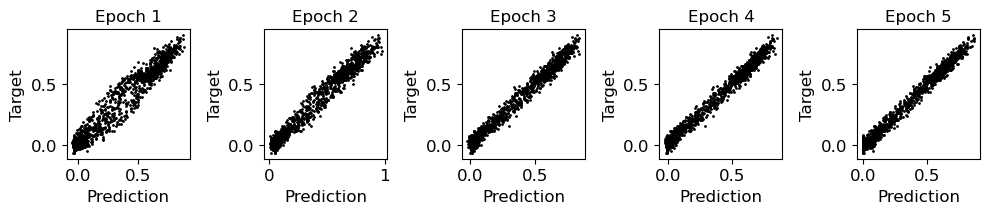

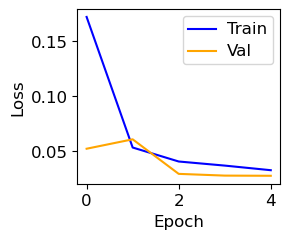

In [3]:
# load results
fig, axs = plt.subplots(1, 5, figsize=(10, 2.25), tight_layout=True)

train_losses = []
val_losses = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_rgr/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    targs = data['val_targ']
    preds = data['val_pred']
    
    ax.scatter(preds, targs, c='k', s=1)
    
    set_plot(ax, x_label='Prediction', y_label='Target', title=f'Epoch {cepoch+1}')
    
    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'])
set_plot(ax, x_label='Epoch', y_label='Loss')

### Ridge comparison

In [4]:
base = 'data_s5/fly_mini/rgr/'
# base = 'data_s5/fly_mini/rgr_scrambled/'
paths = {
    'train': os.path.join(base, 'train.tsv'),
    'eval': os.path.join(base, 'eval.tsv'),
    'test': os.path.join(base, 'test.tsv')
}

ys, y_hats = fit_song_fmtn(paths, alpha=.1)

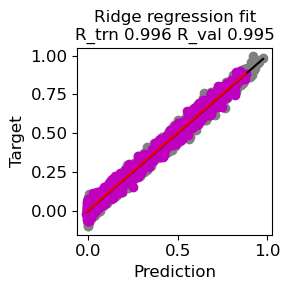

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), tight_layout=True)
ax.scatter(y_hats['train'], ys['train'], c='gray')
x_line, y_line, (slp, icpt, r_trn, p_val, stderr) = get_line(y_hats['train'], ys['train'])
ax.plot(x_line, y_line, c='k')

ax.scatter(y_hats['eval'], ys['eval'], c='m')
x_line, y_line, (slp, icpt, r_val, p_val, stderr) = get_line(y_hats['eval'], ys['eval'])
ax.plot(x_line, y_line, c='r')

set_plot(ax, x_label='Prediction', y_label='Target', title=f'Ridge regression fit\nR_trn {r_trn:.3f} R_val {r_val:.3f}')